# **Sentiment Analysis of YouTube Comments**

# Importing python packages

In [59]:
#Data processing packages
import pandas as pd
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

# Testing Sentiment Analysis


In [21]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

# Importing YouTube comments data

In [65]:
comm = pd.read_csv('/content/sample_data/YTcommentsSheet4.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

# Displaying first 5 rows of data

In [67]:
comm.head()

,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated
0,World Affairs by Unacademy,"🌟Up to 50% Off | Offer Ends tomorrow, Use code <b>PD10</b> &amp; save money 🤩<br>Up to 50% off on your UPSC CSE subscription ends on Oct 31st, 11:59 PM 🚀. <br><br>Embark on your UPSC CSE journey ...",2023-10-31T10:54:41Z,82.0,12.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,AdamSahil FanBoy,​@The Comparisonkan ka video bana juke hain,2023-11-02T02:06:31Z,2023-11-02T02:06:31Z
2,NaN,NaN,NaN,NaN,NaN,Tom roy,​@R sin😂😂😂 Tu jaake western country ke gand chat... Tabhi vah log index Mein top 10 per rakh dega...🤣🤣🤣,2023-10-31T17:31:01Z,2023-10-31T17:31:01Z
3,NaN,NaN,NaN,NaN,NaN,Fun With Learn,PD sir abhi india ki rank 80th hai. According to Henley passport 🛂 index 2023 ...86th nhi hai.....😂😂😂,2023-10-31T15:44:15Z,2023-10-31T15:44:15Z
4,NaN,NaN,NaN,NaN,NaN,A Kalita,"Sir, you have to make a dedicated video about the ptoblem facing by assam ,and west bengal people due to bangladeshi imigrants. For awarness",2023-10-31T13:11:46Z,2023-10-31T13:11:46Z


In [69]:
#Finding the size of the data
comm.shape

(1550, 9)

# Extracting 100 random samples from the data

In [72]:
#Extracting 1000 random samples from the data
comm1 = comm.sample(200)
comm1.shape

(200, 9)

# Calculating Sentiment polarity for each comment

In [74]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in comm.Comment.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)

    except:
        pol.append(0)

# Adding the Sentiment Polarity column to the data

In [75]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol

# Converting the polarity values from continuous to categorical

In [76]:
#Converting the polarity values from continuous to categorical
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

# Displaying Positive comments

In [77]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(10)

,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated,pol
0,World Affairs by Unacademy,"🌟Up to 50% Off | Offer Ends tomorrow, Use code <b>PD10</b> &amp; save money 🤩<br>Up to 50% off on your UPSC CSE subscription ends on Oct 31st, 11:59 PM 🚀. <br><br>Embark on your UPSC CSE journey ...",2023-10-31T10:54:41Z,82.0,12.0,NaN,NaN,NaN,NaN,1.0
13,JP Yadavv,India se khas kar ho log Donkey mar k Europe America jate hai illegal tarike se unki wajah se indian ko jaldi Visa free entry nahi diya jata or hamare indian Passport ka index down hota hai Sri La...,2023-11-05T20:28:19Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
15,ANAND KUMAR UPADHYAY,Thanks sir,2023-11-04T13:57:04Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
17,Maeve That ShitZu Girl,Proud To Be Indian....India Jesa Koi Nahi....❤,2023-11-04T13:14:38Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
20,Ping pong Poof,More,2023-11-04T06:22:26Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
21,Balavantha Giri Goswamy,Nothing free.,2023-11-04T04:16:24Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
22,Amey Vichare,When will india rolling out e-passport kindly make a detailed video on e-passports.,2023-11-03T18:57:37Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
25,Sujit Bhakta,"Bangladesh ek sap hai🐍🐍,, Visa free kar Diya to Pura India khaa jayega.. hamara pura West Bengal ka Kolkata, North, South 24 parganas, Malda, Murshidabad, Siliguri or vi area par Bangladeshi ingl...",2023-11-03T12:04:24Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
33,Mr Hunt,NICE 👍,2023-11-02T19:35:56Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0
37,Mahendra Parmar,Hindustan is the only beautiful ❤️ country....jaha ..per ...<br>(beautiful valley .. ❄️ snow)Jammu Kashmir..<br>Beautiful beaches..party ...night life in Goa.....<br>Ancient culture kings . beauti...,2023-11-02T14:46:44Z,0.0,0.0,NaN,NaN,NaN,NaN,1.0


# Displaying Negative comments

In [78]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(10)

,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated,pol
27,Biswajit Roy,Bhai jo begar he refuse indian wo sahed poor he..but allso bunees man rich.,2023-11-03T06:46:07Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
28,Mowgli37,pakistani se jyada dangerous ye kangludeshi hai ..❤de lgte hai mujhe,2023-11-03T04:53:30Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
49,TTz,India is not a poor country but majority of Indians are poor because large part of India&#39;s resources are shared by few sections of the society only.,2023-11-02T03:32:25Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
50,IAMYOU,"India needed visa to visit Thailand, Sri Lanka? How pathetic we have been?",2023-11-02T02:53:57Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
59,Ankit jainsahab,Naughty Natkhat,2023-11-01T16:03:40Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
63,Prakhar Chauhan,Bangladesh ko seal kro illegal bangladeshi h,2023-11-01T15:24:15Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
74,Yogi Daksh,You mean jese domestic travel karte hai (online ticket book karo aur pahuch jao kabhi bhi) waise hi thailand ja sakte hai kya?,2023-11-01T10:25:27Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
80,Ashwani Rastogi,Very sad to this😢😢😢,2023-11-01T09:14:17Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
89,DSA,IT HAS NOTHING TO DO WITH STRENGTH OF INDIAN PASSPORT. IT IS JUST A TOURISM BOOSTING STEP BY THAILAND...... INDIAN PASSPORT HAS NO REAL VALUE IN WORLD ......😂😂😂😂,2023-11-01T07:56:44Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0
93,xyz abc,reservations caste base se ghatakar economic based krdo india sbse upr chla jayaga,2023-11-01T07:17:30Z,0.0,0.0,NaN,NaN,NaN,NaN,-1.0


# Displaying Neutral comments

In [79]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(10)

,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated,pol
1,NaN,NaN,NaN,NaN,NaN,AdamSahil FanBoy,​@The Comparisonkan ka video bana juke hain,2023-11-02T02:06:31Z,2023-11-02T02:06:31Z,0.0
2,NaN,NaN,NaN,NaN,NaN,Tom roy,​@R sin😂😂😂 Tu jaake western country ke gand chat... Tabhi vah log index Mein top 10 per rakh dega...🤣🤣🤣,2023-10-31T17:31:01Z,2023-10-31T17:31:01Z,0.0
3,NaN,NaN,NaN,NaN,NaN,Fun With Learn,PD sir abhi india ki rank 80th hai. According to Henley passport 🛂 index 2023 ...86th nhi hai.....😂😂😂,2023-10-31T15:44:15Z,2023-10-31T15:44:15Z,0.0
4,NaN,NaN,NaN,NaN,NaN,A Kalita,"Sir, you have to make a dedicated video about the ptoblem facing by assam ,and west bengal people due to bangladeshi imigrants. For awarness",2023-10-31T13:11:46Z,2023-10-31T13:11:46Z,0.0
5,NaN,NaN,NaN,NaN,NaN,omprakash kadam,P,2023-10-31T13:09:35Z,2023-10-31T13:09:35Z,0.0
6,NaN,NaN,NaN,NaN,NaN,hmmm,"Bangladesh or Pakistan chor ke Visa free hoga to accha hoga main jahunga Thailand,,,,but Bangladesh ko kavi vi Visa free nhi karna chahiye india ko ,,,,, Thailand sahi h",2023-10-31T12:55:58Z,2023-10-31T12:55:58Z,0.0
7,NaN,NaN,NaN,NaN,NaN,Garry Sing,"When USA / England di free entry , I’ll say that time Indian passport is strong",2023-10-31T12:43:15Z,2023-10-31T12:43:15Z,0.0
8,NaN,NaN,NaN,NaN,NaN,CrickDo,लोगो को जॉब नही मिल रही है जॉब से छंटनी हो रही है IT कंपनी कोई हायरिंग नही कर रही है क्या india में कोई रिसेशन आ रहा है?,2023-10-31T12:42:16Z,2023-10-31T12:42:16Z,0.0
9,NaN,NaN,NaN,NaN,NaN,Jai Bhavani🙏,Jai Hind to Prasant Sir 🙏🇮🇳💕🔱,2023-10-31T11:47:14Z,2023-10-31T11:47:14Z,0.0
10,NaN,NaN,NaN,NaN,NaN,R sin,what about hunger Index Rank?????,2023-10-31T11:17:57Z,2023-10-31T11:17:57Z,0.0


# Calculating the count of Positive, Negative & Neutral comments

 0.0    1049
 1.0     385
-1.0     116
Name: pol, dtype: int64

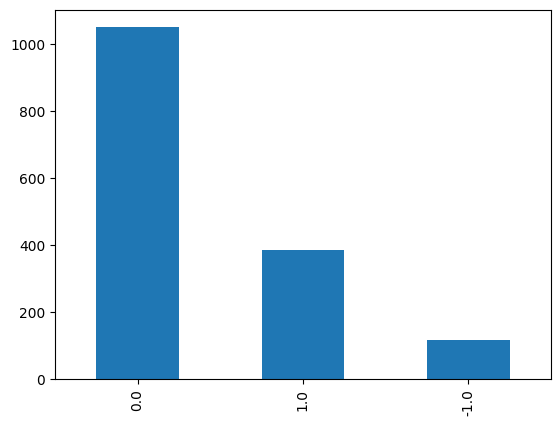

In [80]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()